# 📊 Data Science Pipeline - Análise Exploratória de Dados (EDA)

**Autor:** Data Science Professional  
**Versão:** 1.0  
**Última Atualização:** Janeiro 2026

---

## 📋 Índice

1. **Configuração do Ambiente** - Imports e configurações iniciais
2. **Carregamento dos Dados** - Leitura e primeira visualização
3. **Visão Geral dos Dados** - Estrutura, tipos e estatísticas descritivas
4. **Análise de Valores Ausentes** - Identificação e tratamento
5. **Análise de Duplicatas** - Detecção e remoção
6. **Análise Univariada** - Distribuição de variáveis individuais
7. **Análise Bivariada** - Relações entre variáveis
8. **Análise de Correlação** - Matriz de correlação
9. **Detecção de Outliers** - Identificação e tratamento
10. **Limpeza e Transformação** - Pipeline de pré-processamento
11. **Exportação dos Dados Limpos** - Salvamento do dataset tratado

---

## 1. 🔧 Configuração do Ambiente

### 1.1 Imports Essenciais

In [21]:
# ============================================================================
# IMPORTS - Bibliotecas Essenciais para Data Science
# ============================================================================

# Manipulação de dados
import pandas as pd
import numpy as np

# Visualização
import matplotlib.pyplot as plt
import seaborn as sns

# Estatísticas e Pré-processamento
from scipy import stats
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Configurações de visualização
import warnings
warnings.filterwarnings('ignore')

# Configurações do Pandas
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
pd.set_option('display.float_format', '{:.2f}'.format)

# Configurações do Matplotlib/Seaborn
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 12
plt.rcParams['axes.titlesize'] = 14
plt.rcParams['axes.labelsize'] = 12

# Sistema
import os
from pathlib import Path
from datetime import datetime

print("✅ Todas as bibliotecas importadas com sucesso!")
print(f"📅 Data de execução: {datetime.now().strftime('%Y-%m-%d %H:%M:%S')}")
print(f"🐍 Pandas: {pd.__version__}")
print(f"🔢 NumPy: {np.__version__}")

✅ Todas as bibliotecas importadas com sucesso!
📅 Data de execução: 2026-01-18 21:33:56
🐍 Pandas: 2.3.3
🔢 NumPy: 2.4.1


### 1.2 Configurações do Projeto

In [22]:
# ============================================================================
# CONFIGURAÇÕES DO PROJETO
# ============================================================================

# Paths
PROJECT_ROOT = Path("..").resolve()
DATA_PATH = PROJECT_ROOT / "data"
OUTPUT_PATH = PROJECT_ROOT / "data" / "processed"

# Criar diretório de saída se não existir
OUTPUT_PATH.mkdir(parents=True, exist_ok=True)

# Arquivo de dados (ALTERE CONFORME NECESSÁRIO)
DATA_FILE = "house_data.csv"  # 👈 Altere aqui o nome do arquivo

# Coluna alvo (ALTERE CONFORME NECESSÁRIO)
TARGET_COL = "price"  # 👈 Altere aqui a coluna target

# Seed para reprodutibilidade
RANDOM_STATE = 42
np.random.seed(RANDOM_STATE)

print(f"📁 Diretório do projeto: {PROJECT_ROOT}")
print(f"📂 Diretório de dados: {DATA_PATH}")
print(f"📂 Diretório de saída: {OUTPUT_PATH}")
print(f"📄 Arquivo de dados: {DATA_FILE}")
print(f"🎯 Coluna target: {TARGET_COL}")

📁 Diretório do projeto: /home/hmayer/Documents/github/learning-oreilly/devops-mlops/house-price-prediction
📂 Diretório de dados: /home/hmayer/Documents/github/learning-oreilly/devops-mlops/house-price-prediction/data
📂 Diretório de saída: /home/hmayer/Documents/github/learning-oreilly/devops-mlops/house-price-prediction/data/processed
📄 Arquivo de dados: house_data.csv
🎯 Coluna target: price


---
## 2. 📥 Carregamento dos Dados

In [23]:
# ============================================================================
# CARREGAMENTO DOS DADOS
# ============================================================================

def load_data(filepath: str, **kwargs) -> pd.DataFrame:
    """
    Carrega dados de diferentes formatos (CSV, Excel, Parquet, JSON).
    
    Args:
        filepath: Caminho para o arquivo de dados
        **kwargs: Argumentos adicionais para o leitor
    
    Returns:
        DataFrame com os dados carregados
    """
    file_ext = Path(filepath).suffix.lower()
    
    readers = {
        '.csv': pd.read_csv,
        '.xlsx': pd.read_excel,
        '.xls': pd.read_excel,
        '.parquet': pd.read_parquet,
        '.json': pd.read_json,
        '.feather': pd.read_feather,
    }
    
    if file_ext not in readers:
        raise ValueError(f"Formato não suportado: {file_ext}")
    
    return readers[file_ext](filepath, **kwargs)

# Carregar dados
df = load_data(DATA_PATH / DATA_FILE)

print(f"✅ Dados carregados com sucesso!")
print(f"📊 Shape: {df.shape[0]:,} linhas x {df.shape[1]} colunas")
print(f"💾 Memória: {df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")

✅ Dados carregados com sucesso!
📊 Shape: 84 linhas x 7 colunas
💾 Memória: 0.01 MB


In [24]:
# Visualizar primeiras linhas
print("🔍 Primeiras 5 linhas:")
df.head()

🔍 Primeiras 5 linhas:


,price,sqft,bedrooms,bathrooms,location,year_built,condition
0,495000,1527,2,1.50,Suburb,1956,Good
1,752000,2526,3,2.50,Downtown,1998,Excellent
2,319000,1622,2,1.50,Rural,1975,Fair
3,1210000,3102,4,3.00,Waterfront,2005,Excellent
4,462000,1835,2,2.00,Urban,1982,Good


In [25]:
# Visualizar últimas linhas
print("🔍 Últimas 5 linhas:")
df.tail()

🔍 Últimas 5 linhas:


,price,sqft,bedrooms,bathrooms,location,year_built,condition
79,530000,2080,3,2.00,Urban,1991,Good
80,372000,1640,2,1.50,Suburb,1963,Fair
81,592000,2220,3,2.00,Downtown,1985,Good
82,328000,1730,2,1.50,Rural,1965,Fair
83,1190000,3170,4,3.50,Waterfront,2006,Excellent


---
## 3. 🔎 Visão Geral dos Dados

### 3.1 Estrutura e Tipos de Dados

In [26]:
# ============================================================================
# ESTRUTURA DOS DADOS
# ============================================================================

def get_data_overview(df: pd.DataFrame) -> pd.DataFrame:
    """
    Retorna uma visão geral detalhada do DataFrame.
    
    Args:
        df: DataFrame para análise
    
    Returns:
        DataFrame com informações sobre cada coluna
    """
    overview = pd.DataFrame({
        'Tipo': df.dtypes,
        'Não Nulos': df.count(),
        'Nulos': df.isnull().sum(),
        '% Nulos': (df.isnull().sum() / len(df) * 100).round(2),
        'Únicos': df.nunique(),
        '% Únicos': (df.nunique() / len(df) * 100).round(2),
        'Memória (KB)': (df.memory_usage(deep=True) / 1024).round(2),
    })
    overview.index.name = 'Coluna'
    return overview

# Visão geral
print("📋 VISÃO GERAL DO DATASET")
print("=" * 60)
get_data_overview(df)

📋 VISÃO GERAL DO DATASET


,Tipo,Não Nulos,Nulos,% Nulos,Únicos,% Únicos,Memória (KB)
Coluna,,,,,,,
Index,NaN,NaN,NaN,NaN,NaN,NaN,0.13
bathrooms,float64,84.00,0.00,0.00,8.00,9.52,0.66
bedrooms,int64,84.00,0.00,0.00,4.00,4.76,0.66
condition,object,84.00,0.00,0.00,4.00,4.76,4.46
location,object,84.00,0.00,0.00,6.00,7.14,4.58
price,int64,84.00,0.00,0.00,83.00,98.81,0.66
sqft,int64,84.00,0.00,0.00,67.00,79.76,0.66
year_built,int64,84.00,0.00,0.00,53.00,63.10,0.66


In [27]:
# Informações do DataFrame
print("📊 INFO DO DATAFRAME:")
print("=" * 60)
df.info()

📊 INFO DO DATAFRAME:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84 entries, 0 to 83
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   price       84 non-null     int64  
 1   sqft        84 non-null     int64  
 2   bedrooms    84 non-null     int64  
 3   bathrooms   84 non-null     float64
 4   location    84 non-null     object 
 5   year_built  84 non-null     int64  
 6   condition   84 non-null     object 
dtypes: float64(1), int64(4), object(2)
memory usage: 4.7+ KB


### 3.2 Estatísticas Descritivas

In [28]:
# ============================================================================
# ESTATÍSTICAS DESCRITIVAS - VARIÁVEIS NUMÉRICAS
# ============================================================================

# Identificar colunas numéricas e categóricas
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
categorical_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()

print(f"📊 Colunas Numéricas ({len(numeric_cols)}): {numeric_cols}")
print(f"📝 Colunas Categóricas ({len(categorical_cols)}): {categorical_cols}")
print("\n" + "=" * 60)
print("📈 ESTATÍSTICAS DESCRITIVAS - VARIÁVEIS NUMÉRICAS")
print("=" * 60)

# Estatísticas expandidas
df[numeric_cols].describe(percentiles=[.01, .05, .25, .50, .75, .95, .99]).T

📊 Colunas Numéricas (5): ['price', 'sqft', 'bedrooms', 'bathrooms', 'year_built']
📝 Colunas Categóricas (2): ['location', 'condition']

📈 ESTATÍSTICAS DESCRITIVAS - VARIÁVEIS NUMÉRICAS


,count,mean,std,min,1%,5%,25%,50%,75%,95%,99%,max
price,84.00,628559.52,359167.83,249000.00,250660.00,265200.00,374250.00,511000.00,729250.00,1374000.00,1597000.00,1680000.00
sqft,84.00,2191.50,650.02,1350.00,1374.90,1441.50,1695.00,1995.00,2590.00,3471.00,3708.90,3850.00
bedrooms,84.00,2.86,0.85,2.00,2.00,2.00,2.00,3.00,3.00,4.00,5.00,5.00
bathrooms,84.00,2.19,0.83,1.00,1.00,1.00,1.50,2.00,2.50,4.00,4.09,4.50
year_built,84.00,1982.05,19.50,1947.00,1947.83,1951.15,1965.00,1982.50,1995.50,2013.70,2018.17,2019.00


In [29]:
# ============================================================================
# ESTATÍSTICAS DESCRITIVAS - VARIÁVEIS CATEGÓRICAS
# ============================================================================

if categorical_cols:
    print("📝 ESTATÍSTICAS DESCRITIVAS - VARIÁVEIS CATEGÓRICAS")
    print("=" * 60)
    display(df[categorical_cols].describe().T)
    
    print("\n📊 DISTRIBUIÇÃO DE VALORES POR CATEGORIA")
    print("=" * 60)
    for col in categorical_cols:
        print(f"\n🔹 {col}:")
        print(df[col].value_counts())
else:
    print("ℹ️ Nenhuma variável categórica encontrada.")

📝 ESTATÍSTICAS DESCRITIVAS - VARIÁVEIS CATEGÓRICAS


,count,unique,top,freq
location,84,6,Suburb,17
condition,84,4,Good,37



📊 DISTRIBUIÇÃO DE VALORES POR CATEGORIA

🔹 location:
location
Suburb        17
Downtown      17
Rural         17
Urban         16
Waterfront    15
Mountain       2
Name: count, dtype: int64

🔹 condition:
condition
Good         37
Excellent    22
Fair         19
Poor          6
Name: count, dtype: int64


---
## 4. 🔍 Análise de Valores Ausentes

In [30]:
# ============================================================================
# ANÁLISE DE VALORES AUSENTES (MISSING VALUES)
# ============================================================================

def analyze_missing_values(df: pd.DataFrame) -> pd.DataFrame:
    """
    Analisa valores ausentes no DataFrame.
    
    Args:
        df: DataFrame para análise
    
    Returns:
        DataFrame com análise de valores ausentes
    """
    missing = df.isnull().sum()
    missing_pct = (missing / len(df) * 100).round(2)
    
    missing_df = pd.DataFrame({
        'Valores Ausentes': missing,
        '% Ausentes': missing_pct,
        'Tipo': df.dtypes
    })
    
    # Filtrar apenas colunas com valores ausentes
    missing_df = missing_df[missing_df['Valores Ausentes'] > 0].sort_values(
        by='% Ausentes', ascending=False
    )
    
    return missing_df

# Análise de valores ausentes
missing_analysis = analyze_missing_values(df)

print("🔍 ANÁLISE DE VALORES AUSENTES")
print("=" * 60)
print(f"Total de valores ausentes: {df.isnull().sum().sum():,}")
print(f"% total de ausentes: {(df.isnull().sum().sum() / df.size * 100):.2f}%")
print(f"Colunas com ausentes: {len(missing_analysis)}/{len(df.columns)}")

if len(missing_analysis) > 0:
    print("\n📊 Detalhamento por coluna:")
    display(missing_analysis)
else:
    print("\n✅ Nenhum valor ausente encontrado!")

🔍 ANÁLISE DE VALORES AUSENTES
Total de valores ausentes: 0
% total de ausentes: 0.00%
Colunas com ausentes: 0/7

✅ Nenhum valor ausente encontrado!


In [31]:
# ============================================================================
# VISUALIZAÇÃO DE VALORES AUSENTES
# ============================================================================

def plot_missing_values(df: pd.DataFrame):
    """
    Cria visualização dos valores ausentes.
    
    Args:
        df: DataFrame para análise
    """
    missing = df.isnull().sum()
    missing = missing[missing > 0].sort_values(ascending=True)
    
    if len(missing) == 0:
        print("✅ Sem valores ausentes para visualizar!")
        return
    
    fig, axes = plt.subplots(1, 2, figsize=(14, max(6, len(missing) * 0.4)))
    
    # Gráfico de barras
    colors = plt.cm.Reds(np.linspace(0.3, 0.9, len(missing)))
    missing.plot(kind='barh', ax=axes[0], color=colors)
    axes[0].set_xlabel('Quantidade de Valores Ausentes')
    axes[0].set_title('📊 Valores Ausentes por Coluna')
    
    # Adicionar valores nas barras
    for i, v in enumerate(missing):
        axes[0].text(v + 0.5, i, f'{v:,} ({v/len(df)*100:.1f}%)', va='center')
    
    # Heatmap de nulos
    sns.heatmap(df.isnull(), cbar=True, yticklabels=False, cmap='YlOrRd', ax=axes[1])
    axes[1].set_title('🗺️ Mapa de Valores Ausentes')
    
    plt.tight_layout()
    plt.show()

plot_missing_values(df)

✅ Sem valores ausentes para visualizar!


---
## 5. 🔄 Análise de Duplicatas

In [32]:
# ============================================================================
# ANÁLISE DE DUPLICATAS
# ============================================================================

def analyze_duplicates(df: pd.DataFrame, subset: list = None) -> dict:
    """
    Analisa linhas duplicadas no DataFrame.
    
    Args:
        df: DataFrame para análise
        subset: Lista de colunas para verificar duplicatas (None = todas)
    
    Returns:
        Dicionário com informações sobre duplicatas
    """
    duplicates = df.duplicated(subset=subset)
    n_duplicates = duplicates.sum()
    
    return {
        'total_duplicates': n_duplicates,
        'pct_duplicates': (n_duplicates / len(df) * 100),
        'duplicate_rows': df[duplicates] if n_duplicates > 0 else None
    }

# Análise de duplicatas
dup_analysis = analyze_duplicates(df)

print("🔄 ANÁLISE DE DUPLICATAS")
print("=" * 60)
print(f"Total de linhas duplicadas: {dup_analysis['total_duplicates']:,}")
print(f"% de duplicatas: {dup_analysis['pct_duplicates']:.2f}%")

if dup_analysis['total_duplicates'] > 0:
    print("\n📋 Exemplo de linhas duplicadas:")
    display(dup_analysis['duplicate_rows'].head(10))
else:
    print("\n✅ Nenhuma linha duplicada encontrada!")

🔄 ANÁLISE DE DUPLICATAS
Total de linhas duplicadas: 0
% de duplicatas: 0.00%

✅ Nenhuma linha duplicada encontrada!


---
## 6. 📊 Análise Univariada

### 6.1 Distribuição de Variáveis Numéricas

📊 DISTRIBUIÇÃO DAS VARIÁVEIS NUMÉRICAS


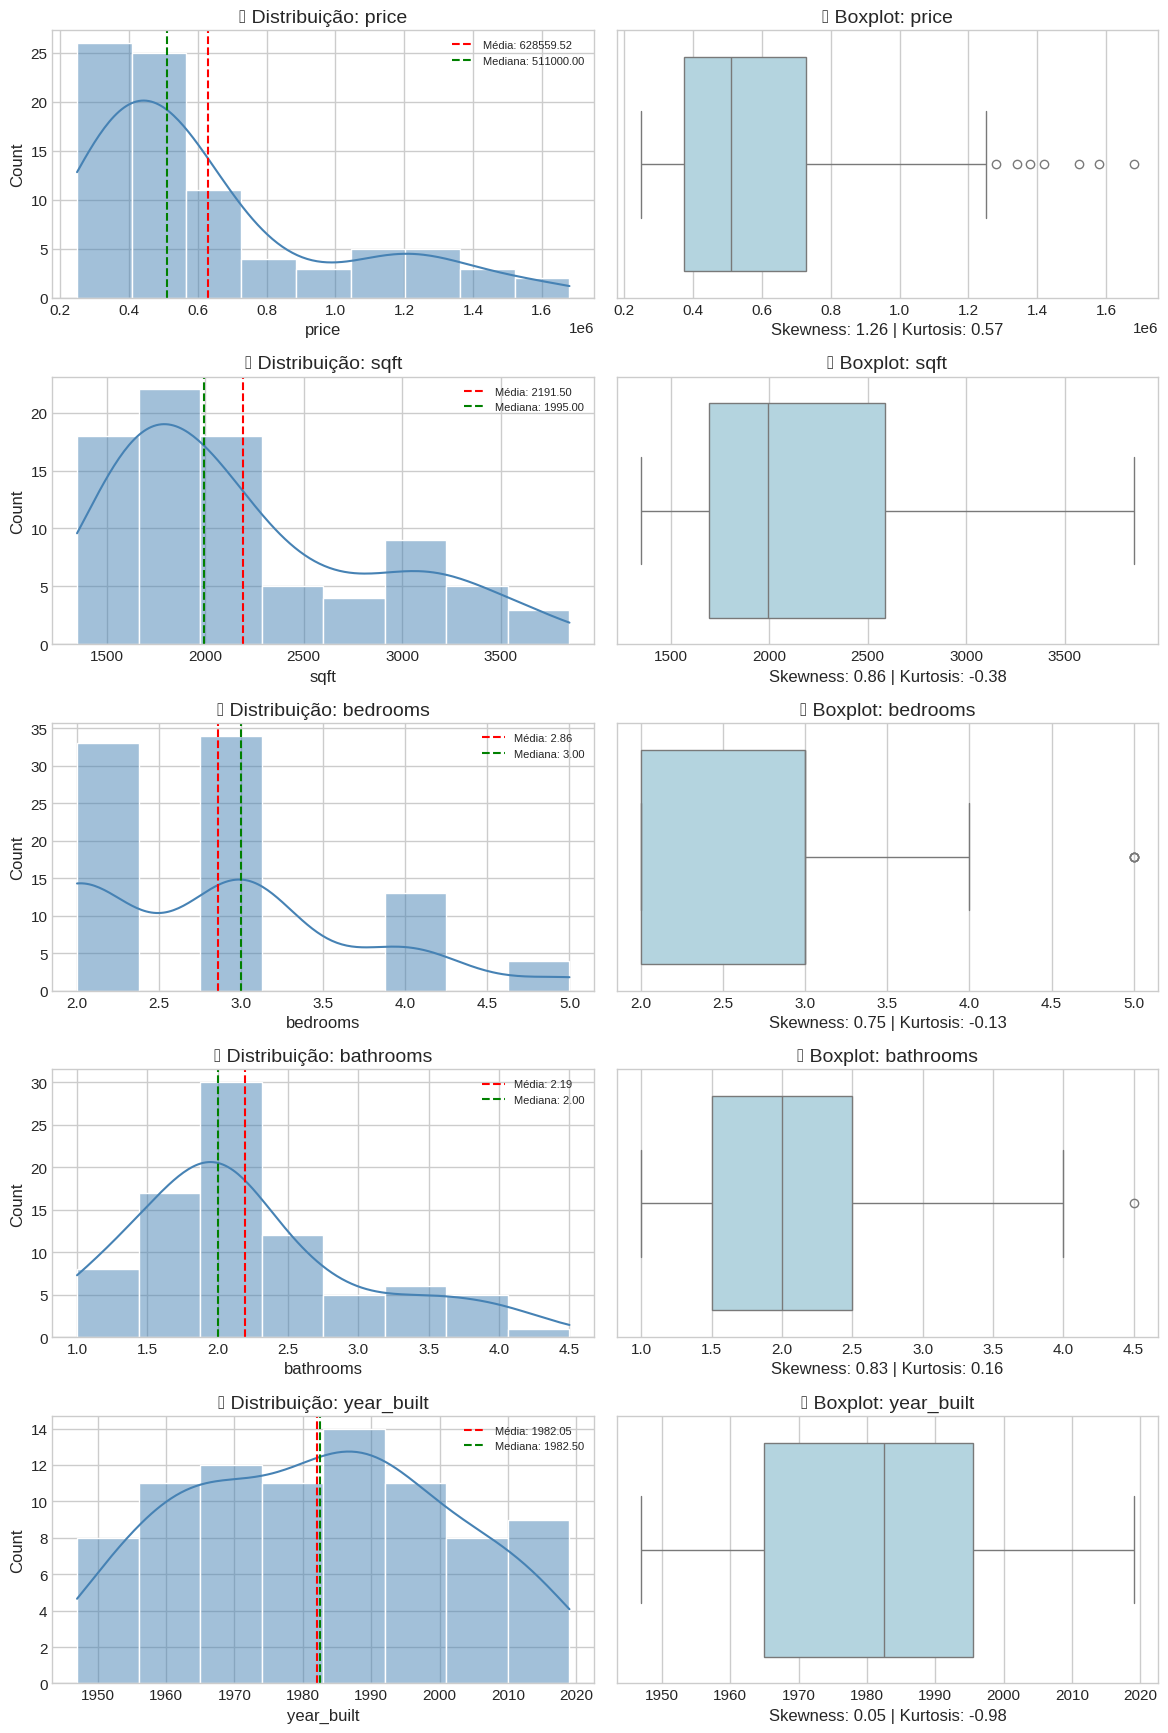

In [33]:
# ============================================================================
# DISTRIBUIÇÃO DE VARIÁVEIS NUMÉRICAS
# ============================================================================

def plot_numeric_distributions(df: pd.DataFrame, cols: list = None, figsize_per_col: tuple = (5, 4)):
    """
    Plota distribuições de variáveis numéricas com histograma e boxplot.
    
    Args:
        df: DataFrame com os dados
        cols: Lista de colunas numéricas (None = detecta automaticamente)
        figsize_per_col: Tamanho da figura por coluna
    """
    if cols is None:
        cols = df.select_dtypes(include=[np.number]).columns.tolist()
    
    n_cols = len(cols)
    if n_cols == 0:
        print("ℹ️ Nenhuma variável numérica para plotar.")
        return
    
    fig, axes = plt.subplots(n_cols, 2, figsize=(12, n_cols * 3.5))
    
    if n_cols == 1:
        axes = axes.reshape(1, -1)
    
    for i, col in enumerate(cols):
        data = df[col].dropna()
        
        # Histograma com KDE
        sns.histplot(data, kde=True, ax=axes[i, 0], color='steelblue', edgecolor='white')
        axes[i, 0].axvline(data.mean(), color='red', linestyle='--', label=f'Média: {data.mean():.2f}')
        axes[i, 0].axvline(data.median(), color='green', linestyle='--', label=f'Mediana: {data.median():.2f}')
        axes[i, 0].set_title(f'📊 Distribuição: {col}')
        axes[i, 0].legend(fontsize=8)
        
        # Boxplot
        sns.boxplot(x=data, ax=axes[i, 1], color='lightblue')
        axes[i, 1].set_title(f'📦 Boxplot: {col}')
        
        # Estatísticas adicionais
        skewness = stats.skew(data)
        kurtosis = stats.kurtosis(data)
        axes[i, 1].set_xlabel(f'Skewness: {skewness:.2f} | Kurtosis: {kurtosis:.2f}')
    
    plt.tight_layout()
    plt.show()

print("📊 DISTRIBUIÇÃO DAS VARIÁVEIS NUMÉRICAS")
print("=" * 60)
plot_numeric_distributions(df, numeric_cols)

### 6.2 Distribuição de Variáveis Categóricas

📝 DISTRIBUIÇÃO DAS VARIÁVEIS CATEGÓRICAS


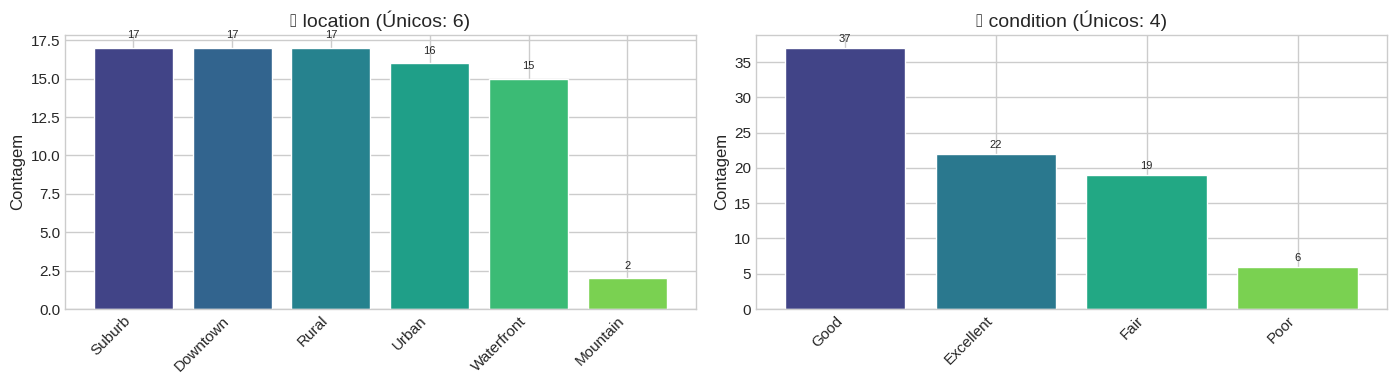

In [34]:
# ============================================================================
# DISTRIBUIÇÃO DE VARIÁVEIS CATEGÓRICAS
# ============================================================================

def plot_categorical_distributions(df: pd.DataFrame, cols: list = None, top_n: int = 15):
    """
    Plota distribuições de variáveis categóricas.
    
    Args:
        df: DataFrame com os dados
        cols: Lista de colunas categóricas (None = detecta automaticamente)
        top_n: Número máximo de categorias a exibir
    """
    if cols is None:
        cols = df.select_dtypes(include=['object', 'category']).columns.tolist()
    
    n_cols = len(cols)
    if n_cols == 0:
        print("ℹ️ Nenhuma variável categórica para plotar.")
        return
    
    # Calcular número de linhas necessárias
    n_rows = (n_cols + 1) // 2
    fig, axes = plt.subplots(n_rows, 2, figsize=(14, n_rows * 4))
    axes = axes.flatten() if n_cols > 1 else [axes]
    
    for i, col in enumerate(cols):
        # Contar valores e pegar top N
        value_counts = df[col].value_counts().head(top_n)
        
        # Criar gráfico de barras
        colors = plt.cm.viridis(np.linspace(0.2, 0.8, len(value_counts)))
        bars = axes[i].bar(range(len(value_counts)), value_counts.values, color=colors)
        axes[i].set_xticks(range(len(value_counts)))
        axes[i].set_xticklabels(value_counts.index, rotation=45, ha='right')
        axes[i].set_title(f'📊 {col} (Únicos: {df[col].nunique()})')
        axes[i].set_ylabel('Contagem')
        
        # Adicionar valores nas barras
        for bar, val in zip(bars, value_counts.values):
            axes[i].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.5, 
                        f'{val}', ha='center', va='bottom', fontsize=8)
    
    # Remover eixos vazios
    for j in range(i + 1, len(axes)):
        axes[j].set_visible(False)
    
    plt.tight_layout()
    plt.show()

print("📝 DISTRIBUIÇÃO DAS VARIÁVEIS CATEGÓRICAS")
print("=" * 60)
plot_categorical_distributions(df, categorical_cols)

---
## 7. 🔗 Análise Bivariada

### 7.1 Variáveis Numéricas vs Target

📈 VARIÁVEIS NUMÉRICAS vs price


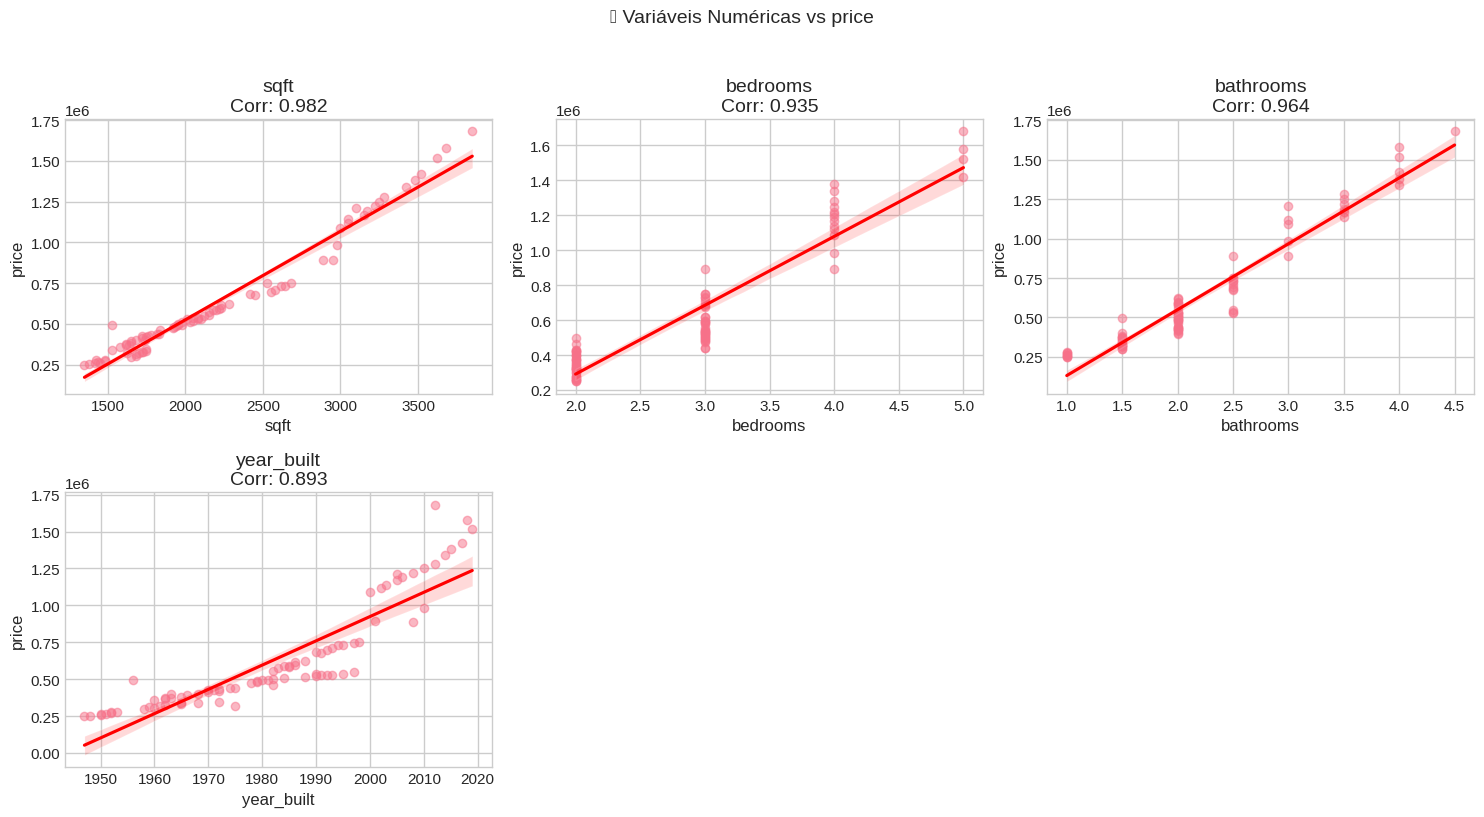

In [35]:
# ============================================================================
# ANÁLISE BIVARIADA - NUMÉRICO vs TARGET
# ============================================================================

def plot_numeric_vs_target(df: pd.DataFrame, target: str, cols: list = None):
    """
    Plota scatter plots de variáveis numéricas vs target.
    
    Args:
        df: DataFrame com os dados
        target: Nome da coluna target
        cols: Lista de colunas numéricas
    """
    if cols is None:
        cols = df.select_dtypes(include=[np.number]).columns.tolist()
    
    # Remover target da lista se presente
    cols = [c for c in cols if c != target]
    
    if not cols:
        print("ℹ️ Nenhuma variável numérica para plotar.")
        return
    
    n_cols = len(cols)
    n_rows = (n_cols + 2) // 3
    fig, axes = plt.subplots(n_rows, 3, figsize=(15, n_rows * 4))
    axes = axes.flatten()
    
    for i, col in enumerate(cols):
        # Scatter plot com linha de tendência
        sns.regplot(data=df, x=col, y=target, ax=axes[i], 
                   scatter_kws={'alpha': 0.5}, line_kws={'color': 'red'})
        
        # Calcular correlação
        corr = df[[col, target]].corr().iloc[0, 1]
        axes[i].set_title(f'{col}\nCorr: {corr:.3f}')
    
    # Remover eixos vazios
    for j in range(i + 1, len(axes)):
        axes[j].set_visible(False)
    
    plt.suptitle(f'📈 Variáveis Numéricas vs {target}', fontsize=14, y=1.02)
    plt.tight_layout()
    plt.show()

if TARGET_COL in df.columns:
    print(f"📈 VARIÁVEIS NUMÉRICAS vs {TARGET_COL}")
    print("=" * 60)
    plot_numeric_vs_target(df, TARGET_COL, numeric_cols)
else:
    print(f"⚠️ Coluna target '{TARGET_COL}' não encontrada no dataset.")

### 7.2 Variáveis Categóricas vs Target

📊 VARIÁVEIS CATEGÓRICAS vs price


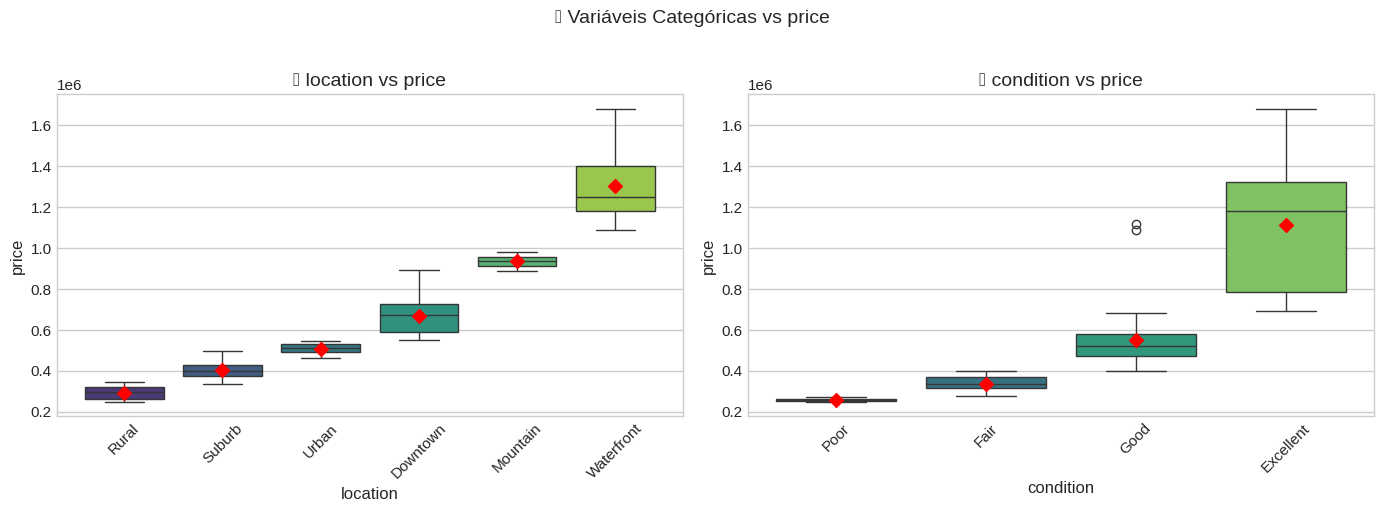

In [36]:
# ============================================================================
# ANÁLISE BIVARIADA - CATEGÓRICO vs TARGET
# ============================================================================

def plot_categorical_vs_target(df: pd.DataFrame, target: str, cols: list = None):
    """
    Plota boxplots de variáveis categóricas vs target numérico.
    
    Args:
        df: DataFrame com os dados
        target: Nome da coluna target numérica
        cols: Lista de colunas categóricas
    """
    if cols is None:
        cols = df.select_dtypes(include=['object', 'category']).columns.tolist()
    
    if not cols:
        print("ℹ️ Nenhuma variável categórica para plotar.")
        return
    
    n_cols = len(cols)
    n_rows = (n_cols + 1) // 2
    fig, axes = plt.subplots(n_rows, 2, figsize=(14, n_rows * 5))
    axes = axes.flatten() if n_cols > 1 else [axes]
    
    for i, col in enumerate(cols):
        # Ordenar por mediana do target
        order = df.groupby(col)[target].median().sort_values().index
        
        # Boxplot
        sns.boxplot(data=df, x=col, y=target, ax=axes[i], order=order, palette='viridis')
        axes[i].set_title(f'📦 {col} vs {target}')
        axes[i].tick_params(axis='x', rotation=45)
        
        # Adicionar média
        means = df.groupby(col)[target].mean().reindex(order)
        for j, mean in enumerate(means):
            axes[i].scatter(j, mean, color='red', s=50, zorder=5, marker='D')
    
    # Remover eixos vazios
    for j in range(i + 1, len(axes)):
        axes[j].set_visible(False)
    
    plt.suptitle(f'📊 Variáveis Categóricas vs {target}', fontsize=14, y=1.02)
    plt.tight_layout()
    plt.show()

if TARGET_COL in df.columns and categorical_cols:
    print(f"📊 VARIÁVEIS CATEGÓRICAS vs {TARGET_COL}")
    print("=" * 60)
    plot_categorical_vs_target(df, TARGET_COL, categorical_cols)
else:
    print(f"ℹ️ Análise não disponível.")

---
## 8. 🔥 Análise de Correlação

🔥 MATRIZ DE CORRELAÇÃO


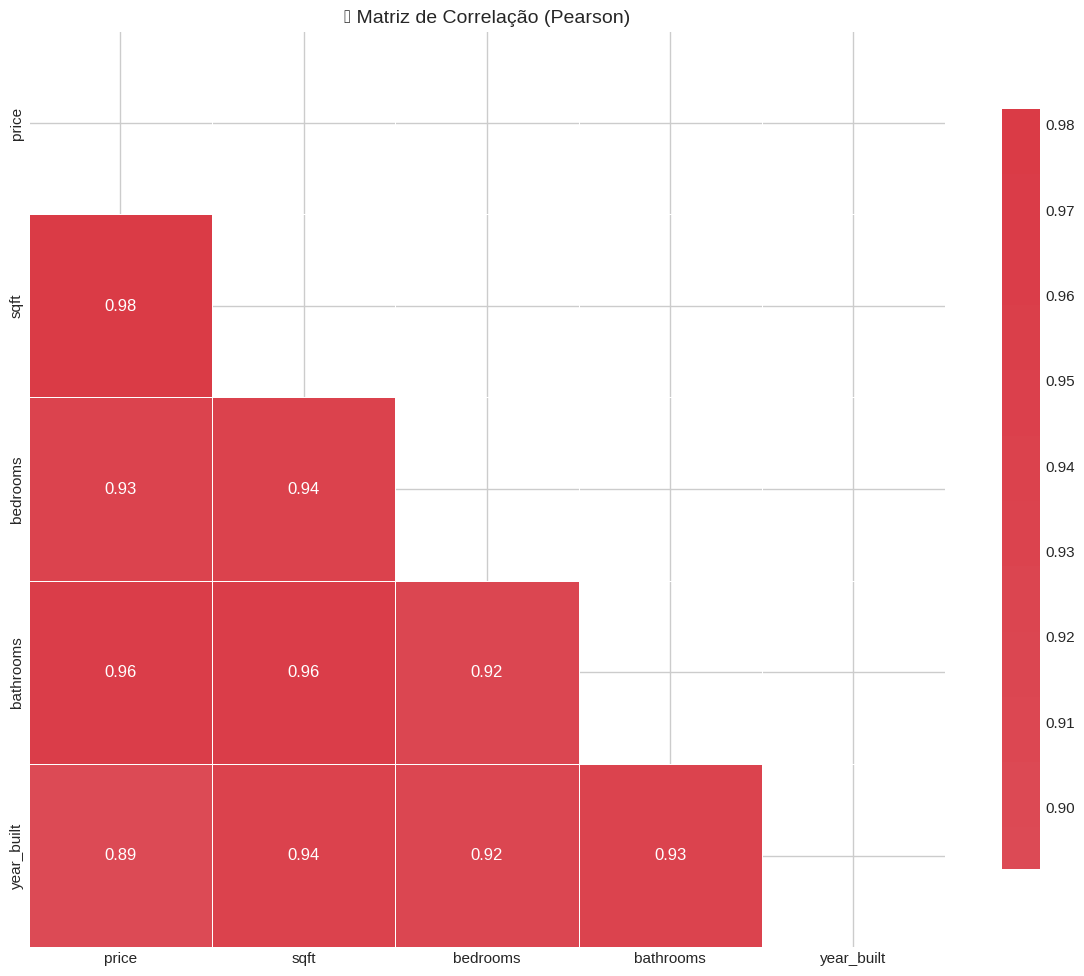

In [37]:
# ============================================================================
# MATRIZ DE CORRELAÇÃO
# ============================================================================

def plot_correlation_matrix(df: pd.DataFrame, method: str = 'pearson', figsize: tuple = (12, 10)):
    """
    Plota matriz de correlação com heatmap.
    
    Args:
        df: DataFrame com os dados
        method: Método de correlação ('pearson', 'spearman', 'kendall')
        figsize: Tamanho da figura
    """
    # Selecionar apenas colunas numéricas
    numeric_df = df.select_dtypes(include=[np.number])
    
    if numeric_df.empty:
        print("ℹ️ Nenhuma variável numérica para correlação.")
        return
    
    # Calcular correlação
    corr = numeric_df.corr(method=method)
    
    # Criar máscara para triângulo superior
    mask = np.triu(np.ones_like(corr, dtype=bool))
    
    # Plotar
    fig, ax = plt.subplots(figsize=figsize)
    
    cmap = sns.diverging_palette(250, 10, as_cmap=True)
    sns.heatmap(corr, mask=mask, cmap=cmap, center=0, annot=True, fmt='.2f',
                square=True, linewidths=0.5, cbar_kws={"shrink": 0.8}, ax=ax)
    
    ax.set_title(f'🔥 Matriz de Correlação ({method.capitalize()})', fontsize=14)
    plt.tight_layout()
    plt.show()
    
    return corr

print("🔥 MATRIZ DE CORRELAÇÃO")
print("=" * 60)
correlation_matrix = plot_correlation_matrix(df)

🎯 CORRELAÇÃO COM O TARGET (price)


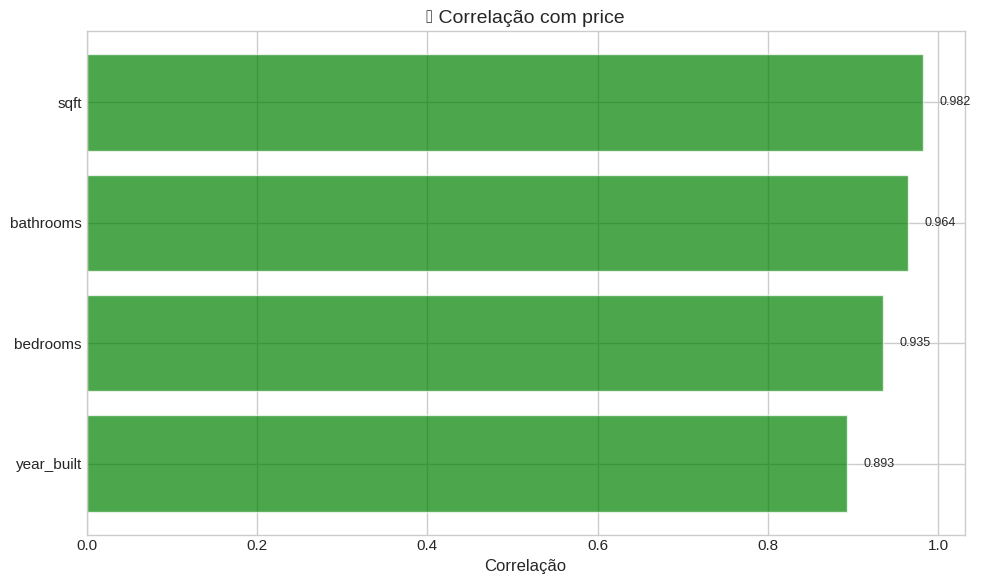

In [38]:
# ============================================================================
# CORRELAÇÃO COM O TARGET
# ============================================================================

def plot_target_correlation(df: pd.DataFrame, target: str, threshold: float = 0.1):
    """
    Plota correlações das variáveis com o target.
    
    Args:
        df: DataFrame com os dados
        target: Coluna target
        threshold: Threshold mínimo de correlação para exibir
    """
    numeric_df = df.select_dtypes(include=[np.number])
    
    if target not in numeric_df.columns:
        print(f"⚠️ Target '{target}' não é numérico ou não existe.")
        return
    
    # Calcular correlações com target
    correlations = numeric_df.corr()[target].drop(target).sort_values()
    
    # Filtrar por threshold
    significant = correlations[abs(correlations) >= threshold]
    
    # Plotar
    fig, ax = plt.subplots(figsize=(10, max(6, len(significant) * 0.4)))
    
    colors = ['red' if x < 0 else 'green' for x in significant.values]
    bars = ax.barh(range(len(significant)), significant.values, color=colors, alpha=0.7)
    
    ax.set_yticks(range(len(significant)))
    ax.set_yticklabels(significant.index)
    ax.set_xlabel('Correlação')
    ax.set_title(f'🎯 Correlação com {target}')
    ax.axvline(x=0, color='black', linewidth=0.5)
    
    # Adicionar valores
    for bar, val in zip(bars, significant.values):
        ax.text(val + 0.02 if val >= 0 else val - 0.02, bar.get_y() + bar.get_height()/2, 
               f'{val:.3f}', va='center', ha='left' if val >= 0 else 'right', fontsize=9)
    
    plt.tight_layout()
    plt.show()
    
    return correlations

if TARGET_COL in df.columns:
    print(f"🎯 CORRELAÇÃO COM O TARGET ({TARGET_COL})")
    print("=" * 60)
    target_correlations = plot_target_correlation(df, TARGET_COL)
else:
    print(f"⚠️ Target '{TARGET_COL}' não encontrado.")

---
## 9. 🚨 Detecção de Outliers

In [39]:
# ============================================================================
# DETECÇÃO DE OUTLIERS - MÉTODO IQR
# ============================================================================

def detect_outliers_iqr(df: pd.DataFrame, cols: list = None, factor: float = 1.5) -> pd.DataFrame:
    """
    Detecta outliers usando o método IQR (Interquartile Range).
    
    Args:
        df: DataFrame com os dados
        cols: Lista de colunas numéricas
        factor: Fator multiplicador do IQR (padrão: 1.5)
    
    Returns:
        DataFrame com informações de outliers por coluna
    """
    if cols is None:
        cols = df.select_dtypes(include=[np.number]).columns.tolist()
    
    outlier_info = []
    
    for col in cols:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        
        lower_bound = Q1 - factor * IQR
        upper_bound = Q3 + factor * IQR
        
        outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
        n_outliers = len(outliers)
        
        outlier_info.append({
            'Coluna': col,
            'Q1': Q1,
            'Q3': Q3,
            'IQR': IQR,
            'Limite Inferior': lower_bound,
            'Limite Superior': upper_bound,
            'N° Outliers': n_outliers,
            '% Outliers': (n_outliers / len(df) * 100)
        })
    
    return pd.DataFrame(outlier_info).set_index('Coluna')

print("🚨 DETECÇÃO DE OUTLIERS (Método IQR)")
print("=" * 60)
outliers_df = detect_outliers_iqr(df, numeric_cols)
display(outliers_df.round(2))

🚨 DETECÇÃO DE OUTLIERS (Método IQR)


,Q1,Q3,IQR,Limite Inferior,Limite Superior,N° Outliers,% Outliers
Coluna,,,,,,,
price,374250.00,729250.00,355000.00,-158250.00,1261750.00,7,8.33
sqft,1695.00,2590.00,895.00,352.50,3932.50,0,0.00
bedrooms,2.00,3.00,1.00,0.50,4.50,4,4.76
bathrooms,1.50,2.50,1.00,0.00,4.00,1,1.19
year_built,1965.00,1995.50,30.50,1919.25,2041.25,0,0.00


In [40]:
# ============================================================================
# DETECÇÃO DE OUTLIERS - MÉTODO Z-SCORE
# ============================================================================

def detect_outliers_zscore(df: pd.DataFrame, cols: list = None, threshold: float = 3.0) -> pd.DataFrame:
    """
    Detecta outliers usando Z-Score.
    
    Args:
        df: DataFrame com os dados
        cols: Lista de colunas numéricas
        threshold: Threshold do Z-Score (padrão: 3.0)
    
    Returns:
        DataFrame com informações de outliers por coluna
    """
    if cols is None:
        cols = df.select_dtypes(include=[np.number]).columns.tolist()
    
    outlier_info = []
    
    for col in cols:
        z_scores = np.abs(stats.zscore(df[col].dropna()))
        n_outliers = (z_scores > threshold).sum()
        
        outlier_info.append({
            'Coluna': col,
            'Média': df[col].mean(),
            'Desvio Padrão': df[col].std(),
            'Threshold': threshold,
            'N° Outliers': n_outliers,
            '% Outliers': (n_outliers / len(df) * 100)
        })
    
    return pd.DataFrame(outlier_info).set_index('Coluna')

print("🚨 DETECÇÃO DE OUTLIERS (Método Z-Score)")
print("=" * 60)
outliers_zscore = detect_outliers_zscore(df, numeric_cols)
display(outliers_zscore.round(2))

🚨 DETECÇÃO DE OUTLIERS (Método Z-Score)


,Média,Desvio Padrão,Threshold,N° Outliers,% Outliers
Coluna,,,,,
price,628559.52,359167.83,3.00,0,0.00
sqft,2191.50,650.02,3.00,0,0.00
bedrooms,2.86,0.85,3.00,0,0.00
bathrooms,2.19,0.83,3.00,0,0.00
year_built,1982.05,19.50,3.00,0,0.00


📊 VISUALIZAÇÃO DE OUTLIERS


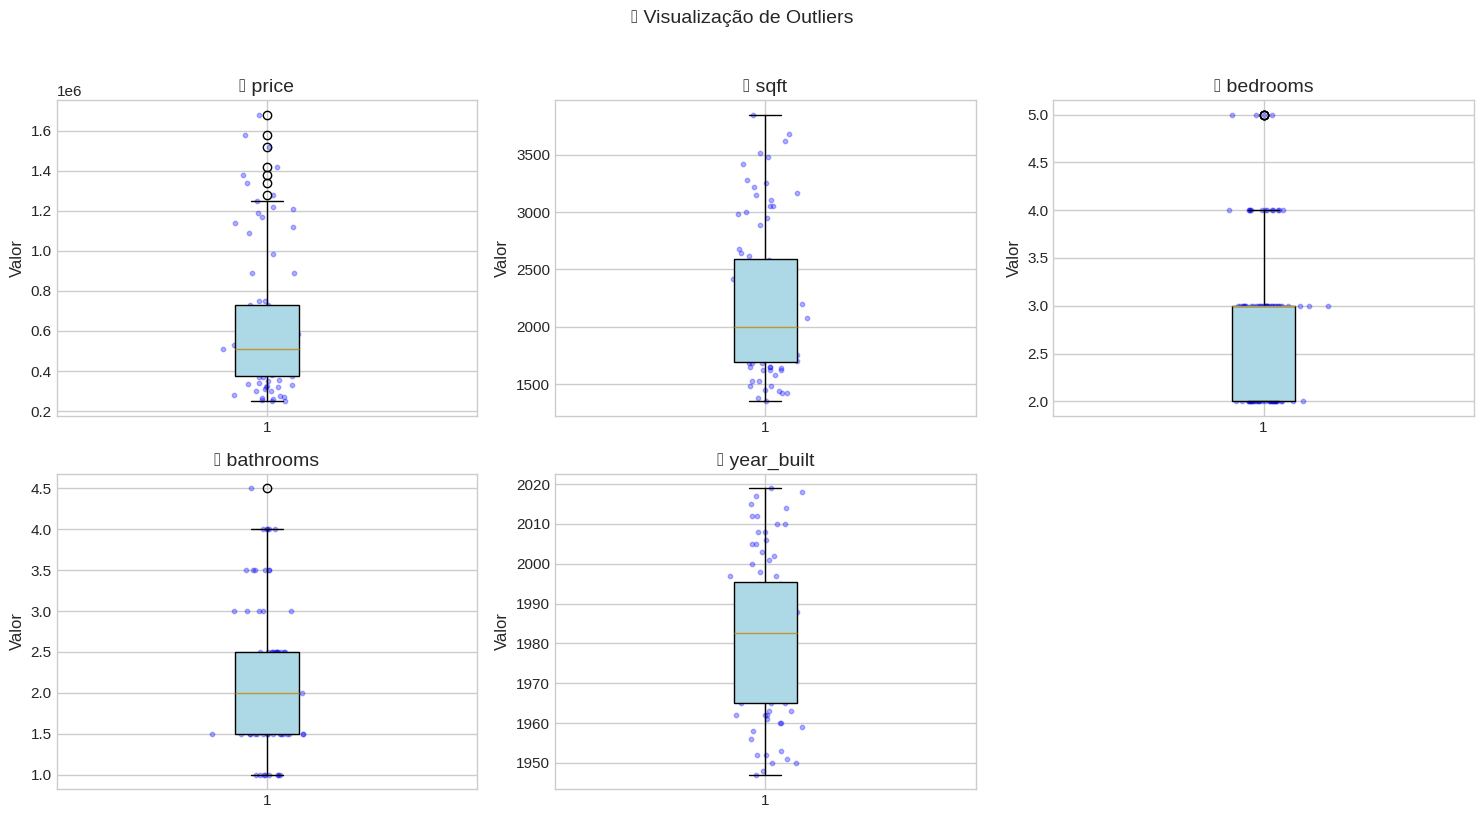

In [41]:
# ============================================================================
# VISUALIZAÇÃO DE OUTLIERS
# ============================================================================

def plot_outliers_boxplots(df: pd.DataFrame, cols: list = None):
    """
    Plota boxplots para visualização de outliers.
    
    Args:
        df: DataFrame com os dados
        cols: Lista de colunas numéricas
    """
    if cols is None:
        cols = df.select_dtypes(include=[np.number]).columns.tolist()
    
    if not cols:
        print("ℹ️ Nenhuma variável numérica para plotar.")
        return
    
    n_cols = len(cols)
    n_rows = (n_cols + 2) // 3
    fig, axes = plt.subplots(n_rows, 3, figsize=(15, n_rows * 4))
    axes = axes.flatten()
    
    for i, col in enumerate(cols):
        # Boxplot com pontos de outliers
        box = axes[i].boxplot(df[col].dropna(), patch_artist=True)
        box['boxes'][0].set_facecolor('lightblue')
        
        # Adicionar pontos individuais (jitter)
        y = df[col].dropna()
        x = np.random.normal(1, 0.04, size=len(y))
        axes[i].scatter(x, y, alpha=0.3, s=10, c='blue')
        
        axes[i].set_title(f'📦 {col}')
        axes[i].set_ylabel('Valor')
    
    # Remover eixos vazios
    for j in range(i + 1, len(axes)):
        axes[j].set_visible(False)
    
    plt.suptitle('🚨 Visualização de Outliers', fontsize=14, y=1.02)
    plt.tight_layout()
    plt.show()

print("📊 VISUALIZAÇÃO DE OUTLIERS")
print("=" * 60)
plot_outliers_boxplots(df, numeric_cols)

---
## 10. 🧹 Limpeza e Transformação de Dados

### 10.1 Funções de Limpeza

In [42]:
# ============================================================================
# FUNÇÕES DE LIMPEZA DE DADOS
# ============================================================================

class DataCleaner:
    """
    Classe para limpeza e transformação de dados.
    """
    
    def __init__(self, df: pd.DataFrame):
        """
        Inicializa o DataCleaner.
        
        Args:
            df: DataFrame original
        """
        self.df = df.copy()
        self.original_shape = df.shape
        self.cleaning_log = []
    
    def remove_duplicates(self, subset: list = None, keep: str = 'first') -> 'DataCleaner':
        """Remove linhas duplicadas."""
        n_before = len(self.df)
        self.df = self.df.drop_duplicates(subset=subset, keep=keep)
        n_removed = n_before - len(self.df)
        self.cleaning_log.append(f"Removidas {n_removed} linhas duplicadas")
        return self
    
    def handle_missing_numeric(self, strategy: str = 'median', cols: list = None) -> 'DataCleaner':
        """
        Trata valores ausentes em colunas numéricas.
        
        Args:
            strategy: 'mean', 'median', 'mode', 'zero', 'drop'
            cols: Lista de colunas (None = todas numéricas)
        """
        if cols is None:
            cols = self.df.select_dtypes(include=[np.number]).columns.tolist()
        
        for col in cols:
            n_missing = self.df[col].isnull().sum()
            if n_missing > 0:
                if strategy == 'mean':
                    self.df[col].fillna(self.df[col].mean(), inplace=True)
                elif strategy == 'median':
                    self.df[col].fillna(self.df[col].median(), inplace=True)
                elif strategy == 'mode':
                    self.df[col].fillna(self.df[col].mode()[0], inplace=True)
                elif strategy == 'zero':
                    self.df[col].fillna(0, inplace=True)
                elif strategy == 'drop':
                    self.df = self.df.dropna(subset=[col])
                
                self.cleaning_log.append(f"{col}: {n_missing} valores preenchidos ({strategy})")
        return self
    
    def handle_missing_categorical(self, strategy: str = 'mode', cols: list = None, 
                                   fill_value: str = 'Unknown') -> 'DataCleaner':
        """
        Trata valores ausentes em colunas categóricas.
        
        Args:
            strategy: 'mode', 'constant', 'drop'
            cols: Lista de colunas (None = todas categóricas)
            fill_value: Valor para preencher (quando strategy='constant')
        """
        if cols is None:
            cols = self.df.select_dtypes(include=['object', 'category']).columns.tolist()
        
        for col in cols:
            n_missing = self.df[col].isnull().sum()
            if n_missing > 0:
                if strategy == 'mode':
                    self.df[col].fillna(self.df[col].mode()[0], inplace=True)
                elif strategy == 'constant':
                    self.df[col].fillna(fill_value, inplace=True)
                elif strategy == 'drop':
                    self.df = self.df.dropna(subset=[col])
                
                self.cleaning_log.append(f"{col}: {n_missing} valores preenchidos ({strategy})")
        return self
    
    def remove_outliers_iqr(self, cols: list = None, factor: float = 1.5) -> 'DataCleaner':
        """Remove outliers usando método IQR."""
        if cols is None:
            cols = self.df.select_dtypes(include=[np.number]).columns.tolist()
        
        n_before = len(self.df)
        
        for col in cols:
            Q1 = self.df[col].quantile(0.25)
            Q3 = self.df[col].quantile(0.75)
            IQR = Q3 - Q1
            lower = Q1 - factor * IQR
            upper = Q3 + factor * IQR
            self.df = self.df[(self.df[col] >= lower) & (self.df[col] <= upper)]
        
        n_removed = n_before - len(self.df)
        self.cleaning_log.append(f"Removidos {n_removed} outliers (IQR)")
        return self
    
    def cap_outliers_iqr(self, cols: list = None, factor: float = 1.5) -> 'DataCleaner':
        """Cap outliers (winsorization) usando método IQR."""
        if cols is None:
            cols = self.df.select_dtypes(include=[np.number]).columns.tolist()
        
        for col in cols:
            Q1 = self.df[col].quantile(0.25)
            Q3 = self.df[col].quantile(0.75)
            IQR = Q3 - Q1
            lower = Q1 - factor * IQR
            upper = Q3 + factor * IQR
            
            n_capped = ((self.df[col] < lower) | (self.df[col] > upper)).sum()
            self.df[col] = self.df[col].clip(lower=lower, upper=upper)
            
            if n_capped > 0:
                self.cleaning_log.append(f"{col}: {n_capped} valores limitados (capping)")
        return self
    
    def drop_columns(self, cols: list) -> 'DataCleaner':
        """Remove colunas especificadas."""
        self.df = self.df.drop(columns=cols, errors='ignore')
        self.cleaning_log.append(f"Removidas colunas: {cols}")
        return self
    
    def drop_high_missing(self, threshold: float = 0.5) -> 'DataCleaner':
        """Remove colunas com mais de threshold% de valores ausentes."""
        missing_pct = self.df.isnull().sum() / len(self.df)
        cols_to_drop = missing_pct[missing_pct > threshold].index.tolist()
        if cols_to_drop:
            self.df = self.df.drop(columns=cols_to_drop)
            self.cleaning_log.append(f"Removidas colunas com >{threshold*100}% ausentes: {cols_to_drop}")
        return self
    
    def get_summary(self) -> None:
        """Imprime resumo das operações de limpeza."""
        print("=" * 60)
        print("📋 RESUMO DA LIMPEZA DE DADOS")
        print("=" * 60)
        print(f"Shape original: {self.original_shape}")
        print(f"Shape final: {self.df.shape}")
        print(f"Linhas removidas: {self.original_shape[0] - self.df.shape[0]}")
        print(f"Colunas removidas: {self.original_shape[1] - self.df.shape[1]}")
        print("\n📝 Log de operações:")
        for log in self.cleaning_log:
            print(f"  • {log}")
    
    def get_clean_data(self) -> pd.DataFrame:
        """Retorna o DataFrame limpo."""
        return self.df

print("✅ Classe DataCleaner carregada com sucesso!")

✅ Classe DataCleaner carregada com sucesso!


### 10.2 Aplicar Limpeza

In [43]:
# ============================================================================
# APLICAR LIMPEZA DE DADOS
# ============================================================================

# Criar instância do cleaner
cleaner = DataCleaner(df)

# Aplicar operações de limpeza (customize conforme necessário)
df_clean = (cleaner
    .remove_duplicates()                           # Remover duplicatas
    .handle_missing_numeric(strategy='median')     # Preencher numéricos com mediana
    .handle_missing_categorical(strategy='mode')   # Preencher categóricos com moda
    # .remove_outliers_iqr()                       # Descomentar para remover outliers
    # .cap_outliers_iqr()                          # Descomentar para limitar outliers
    # .drop_high_missing(threshold=0.5)           # Descomentar para remover colunas com muitos nulos
    .get_clean_data()
)

# Resumo da limpeza
cleaner.get_summary()

📋 RESUMO DA LIMPEZA DE DADOS
Shape original: (84, 7)
Shape final: (84, 7)
Linhas removidas: 0
Colunas removidas: 0

📝 Log de operações:
  • Removidas 0 linhas duplicadas


### 10.3 Pipeline de Pré-processamento com Scikit-Learn

In [44]:
# ============================================================================
# PIPELINE DE PRÉ-PROCESSAMENTO COM SCIKIT-LEARN
# ============================================================================

def create_preprocessing_pipeline(df: pd.DataFrame, target_col: str = None):
    """
    Cria pipeline de pré-processamento para variáveis numéricas e categóricas.
    
    Args:
        df: DataFrame com os dados
        target_col: Nome da coluna target (será excluída do processamento)
    
    Returns:
        ColumnTransformer configurado
    """
    # Identificar colunas
    numeric_features = df.select_dtypes(include=[np.number]).columns.tolist()
    categorical_features = df.select_dtypes(include=['object', 'category']).columns.tolist()
    
    # Remover target das features
    if target_col and target_col in numeric_features:
        numeric_features.remove(target_col)
    
    # Pipeline para variáveis numéricas
    numeric_transformer = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='median')),
        ('scaler', StandardScaler())
    ])
    
    # Pipeline para variáveis categóricas
    categorical_transformer = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='most_frequent')),
        ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
    ])
    
    # Combinar pipelines
    preprocessor = ColumnTransformer(
        transformers=[
            ('num', numeric_transformer, numeric_features),
            ('cat', categorical_transformer, categorical_features)
        ],
        remainder='passthrough'
    )
    
    print(f"📊 Features Numéricas ({len(numeric_features)}): {numeric_features}")
    print(f"📝 Features Categóricas ({len(categorical_features)}): {categorical_features}")
    
    return preprocessor, numeric_features, categorical_features

# Criar pipeline
preprocessor, num_features, cat_features = create_preprocessing_pipeline(df_clean, TARGET_COL)

print("\n✅ Pipeline de pré-processamento criado com sucesso!")

📊 Features Numéricas (4): ['sqft', 'bedrooms', 'bathrooms', 'year_built']
📝 Features Categóricas (2): ['location', 'condition']

✅ Pipeline de pré-processamento criado com sucesso!


In [45]:
# ============================================================================
# APLICAR PIPELINE E VISUALIZAR RESULTADO
# ============================================================================

# Separar features e target
if TARGET_COL in df_clean.columns:
    X = df_clean.drop(columns=[TARGET_COL])
    y = df_clean[TARGET_COL]
else:
    X = df_clean
    y = None

# Ajustar e transformar
X_transformed = preprocessor.fit_transform(X)

# Obter nomes das features transformadas
def get_feature_names(preprocessor, num_features, cat_features):
    """Obtém nomes das features após transformação."""
    feature_names = list(num_features)  # Features numéricas mantêm o nome
    
    # Adicionar nomes das features categóricas (one-hot encoded)
    if cat_features:
        cat_encoder = preprocessor.named_transformers_['cat'].named_steps['onehot']
        cat_feature_names = cat_encoder.get_feature_names_out(cat_features)
        feature_names.extend(cat_feature_names)
    
    return feature_names

feature_names = get_feature_names(preprocessor, num_features, cat_features)

# Criar DataFrame transformado
X_transformed_df = pd.DataFrame(X_transformed, columns=feature_names, index=X.index)

print(f"🔄 Shape original: {X.shape}")
print(f"🔄 Shape transformado: {X_transformed_df.shape}")
print(f"\n📊 Primeiras linhas do dataset transformado:")
X_transformed_df.head()

🔄 Shape original: (84, 6)
🔄 Shape transformado: (84, 14)

📊 Primeiras linhas do dataset transformado:


,sqft,bedrooms,bathrooms,year_built,location_Downtown,location_Mountain,location_Rural,location_Suburb,location_Urban,location_Waterfront,condition_Excellent,condition_Fair,condition_Good,condition_Poor
0,-1.03,-1.01,-0.84,-1.34,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00
1,0.52,0.17,0.38,0.82,1.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00
2,-0.88,-1.01,-0.84,-0.36,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00
3,1.41,1.35,0.98,1.18,0.00,0.00,0.00,0.00,0.00,1.00,1.00,0.00,0.00,0.00
4,-0.55,-1.01,-0.23,-0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00


---
## 11. 💾 Exportação dos Dados

In [46]:
# ============================================================================
# EXPORTAÇÃO DOS DADOS LIMPOS
# ============================================================================

def export_data(df: pd.DataFrame, output_path: Path, filename: str, 
                formats: list = ['csv', 'parquet']):
    """
    Exporta DataFrame para múltiplos formatos.
    
    Args:
        df: DataFrame para exportar
        output_path: Diretório de saída
        filename: Nome base do arquivo (sem extensão)
        formats: Lista de formatos ('csv', 'parquet', 'excel', 'json')
    """
    output_path.mkdir(parents=True, exist_ok=True)
    
    exporters = {
        'csv': lambda df, path: df.to_csv(path, index=False),
        'parquet': lambda df, path: df.to_parquet(path, index=False),
        'excel': lambda df, path: df.to_excel(path, index=False),
        'json': lambda df, path: df.to_json(path, orient='records', indent=2),
    }
    
    for fmt in formats:
        if fmt in exporters:
            filepath = output_path / f"{filename}.{fmt}"
            try:
                exporters[fmt](df, filepath)
                print(f"✅ Exportado: {filepath}")
            except Exception as e:
                print(f"❌ Erro ao exportar {fmt}: {e}")
        else:
            print(f"⚠️ Formato não suportado: {fmt}")

# Exportar dados limpos
print("💾 EXPORTAÇÃO DOS DADOS")
print("=" * 60)
export_data(df_clean, OUTPUT_PATH, 'house_data_clean', formats=['csv'])

💾 EXPORTAÇÃO DOS DADOS
✅ Exportado: /home/hmayer/Documents/github/learning-oreilly/devops-mlops/house-price-prediction/data/processed/house_data_clean.csv


---
## 12. 📝 Relatório Final

In [47]:
# ============================================================================
# RELATÓRIO FINAL
# ============================================================================

def generate_final_report(df_original: pd.DataFrame, df_clean: pd.DataFrame, target: str = None):
    """
    Gera relatório final da análise e limpeza de dados.
    
    Args:
        df_original: DataFrame original
        df_clean: DataFrame após limpeza
        target: Coluna target
    """
    print("=" * 70)
    print("📋 RELATÓRIO FINAL - DATA ENGINEERING PIPELINE")
    print("=" * 70)
    
    print("\n📊 DATASET ORIGINAL:")
    print(f"   • Linhas: {df_original.shape[0]:,}")
    print(f"   • Colunas: {df_original.shape[1]}")
    print(f"   • Valores ausentes: {df_original.isnull().sum().sum():,}")
    print(f"   • Duplicatas: {df_original.duplicated().sum():,}")
    
    print("\n✨ DATASET LIMPO:")
    print(f"   • Linhas: {df_clean.shape[0]:,}")
    print(f"   • Colunas: {df_clean.shape[1]}")
    print(f"   • Valores ausentes: {df_clean.isnull().sum().sum():,}")
    print(f"   • Duplicatas: {df_clean.duplicated().sum():,}")
    
    print("\n📈 RESUMO DAS MUDANÇAS:")
    print(f"   • Linhas removidas: {df_original.shape[0] - df_clean.shape[0]:,}")
    print(f"   • Colunas removidas: {df_original.shape[1] - df_clean.shape[1]}")
    
    if target and target in df_clean.columns:
        print(f"\n🎯 VARIÁVEL TARGET ({target}):")
        print(f"   • Média: {df_clean[target].mean():,.2f}")
        print(f"   • Mediana: {df_clean[target].median():,.2f}")
        print(f"   • Desvio Padrão: {df_clean[target].std():,.2f}")
        print(f"   • Min: {df_clean[target].min():,.2f}")
        print(f"   • Max: {df_clean[target].max():,.2f}")
    
    print("\n" + "=" * 70)
    print("✅ PIPELINE CONCLUÍDO COM SUCESSO!")
    print("=" * 70)

# Gerar relatório
generate_final_report(df, df_clean, TARGET_COL)

📋 RELATÓRIO FINAL - DATA ENGINEERING PIPELINE

📊 DATASET ORIGINAL:
   • Linhas: 84
   • Colunas: 7
   • Valores ausentes: 0
   • Duplicatas: 0

✨ DATASET LIMPO:
   • Linhas: 84
   • Colunas: 7
   • Valores ausentes: 0
   • Duplicatas: 0

📈 RESUMO DAS MUDANÇAS:
   • Linhas removidas: 0
   • Colunas removidas: 0

🎯 VARIÁVEL TARGET (price):
   • Média: 628,559.52
   • Mediana: 511,000.00
   • Desvio Padrão: 359,167.83
   • Min: 249,000.00
   • Max: 1,680,000.00

✅ PIPELINE CONCLUÍDO COM SUCESSO!


---

## 📚 Próximos Passos

Após completar a análise exploratória e limpeza dos dados, os próximos passos típicos incluem:

1. **Feature Engineering** - Criar novas features a partir das existentes
2. **Feature Selection** - Selecionar as features mais relevantes
3. **Modelagem** - Treinar modelos de Machine Learning
4. **Avaliação** - Avaliar performance dos modelos
5. **Deploy** - Colocar o modelo em produção

---

## 🔧 Configurações Personalizáveis

Para adaptar este pipeline ao seu projeto:

| Variável | Descrição | Local |
|----------|-----------|-------|
| `DATA_FILE` | Nome do arquivo de dados | Seção 1.2 |
| `TARGET_COL` | Nome da coluna target | Seção 1.2 |
| `RANDOM_STATE` | Seed para reprodutibilidade | Seção 1.2 |
| Estratégias de limpeza | Método para tratar missing values | Seção 10.2 |

---

**📧 Dúvidas?** Este template foi criado para ser flexível e adaptável a diferentes tipos de projetos de Data Science.